
纯度的衡量方法为gini时
训练集得分为：1.000000
测试集得分为：0.916667
由测试样本得到的预测值
[2 2 1 0 1 2 0 2 1 0 2 2 1 0 0 0 0 0 0 2 0 0 1 1 0 0 1 1 1 0 0 1 0 2 0 2]
实际值
[2 2 1 0 1 2 0 2 1 2 2 2 1 1 2 0 0 0 0 2 0 0 1 1 0 0 1 1 1 0 0 1 0 2 0 2]
决策树深度： 4
决策树叶子节点个数： 6

classes_
 [0 1 2]
feature_importances_
 [0.         0.01976715 0.         0.         0.         0.
 0.39608795 0.         0.         0.39230359 0.         0.02099668
 0.17084463]
n_classes_
 3
tree_
|--- color_intensity <= 3.46
|   |--- weights: [0.00, 48.00, 0.00] class: 1
|--- color_intensity >  3.46
|   |--- flavanoids <= 1.38
|   |   |--- od280/od315_of_diluted_wines <= 2.56
|   |   |   |--- weights: [0.00, 0.00, 37.00] class: 2
|   |   |--- od280/od315_of_diluted_wines >  2.56
|   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |--- flavanoids >  1.38
|   |   |--- proline <= 724.50
|   |   |   |--- malic_acid <= 3.01
|   |   |   |   |--- weights: [0.00, 11.00, 0.00] class: 1
|   |   |   |--- malic_acid >  3.01
|   |   |   |   |--- weights: [1.00

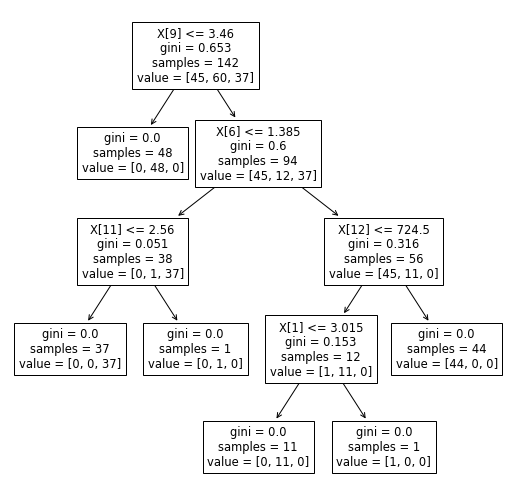

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
# 用于可视化决策树
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text


# 加载数据集
wine_data = load_wine()
data = wine_data.data
target = wine_data.target

# 划分数据集
X_train, X_test, Y_train, Y_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=12
)

model = DecisionTreeClassifier(criterion="gini")

# 训练
model.fit(X_train, Y_train)
# 评分
print("\n纯度的衡量方法为" + model.criterion + "时") 
print("训练集得分为：%.6f" % model.score(X_train, Y_train))
print("测试集得分为：%.6f" % model.score(X_test, Y_test))
# 测试
print("由测试样本得到的预测值")
print(model.predict(X_test))
print("实际值")
print(Y_test)
print("决策树深度：", model.get_depth())
print("决策树叶子节点个数：", model.get_n_leaves())

# 查看参数
print("\nclasses_\n", model.classes_)
print("feature_importances_\n", model.feature_importances_)
print("n_classes_\n", model.n_classes_)
print("tree_\n", model.tree_)

tree_text = export_text(
    model, 
    feature_names=wine_data["feature_names"],
    show_weights=True
) 
print(tree_text)

plt.figure(figsize=(9, 9))
tree.plot_tree(model)
plt.show()
